This analysis deducts insights from the sales of groceries in a supermarket.
We will attempt to answer the following questions:

1. What is the most selling category?
2. What is the most selling product?
3. What are our all year sales?
4. How did one year compare to another?
5. What impact did discounts have on our sales?
6. What is the worth of the return goods?
7. What is the growth rate of each category across the years?
8. What are the rush hours?
9. What can we deduct from the kilo field

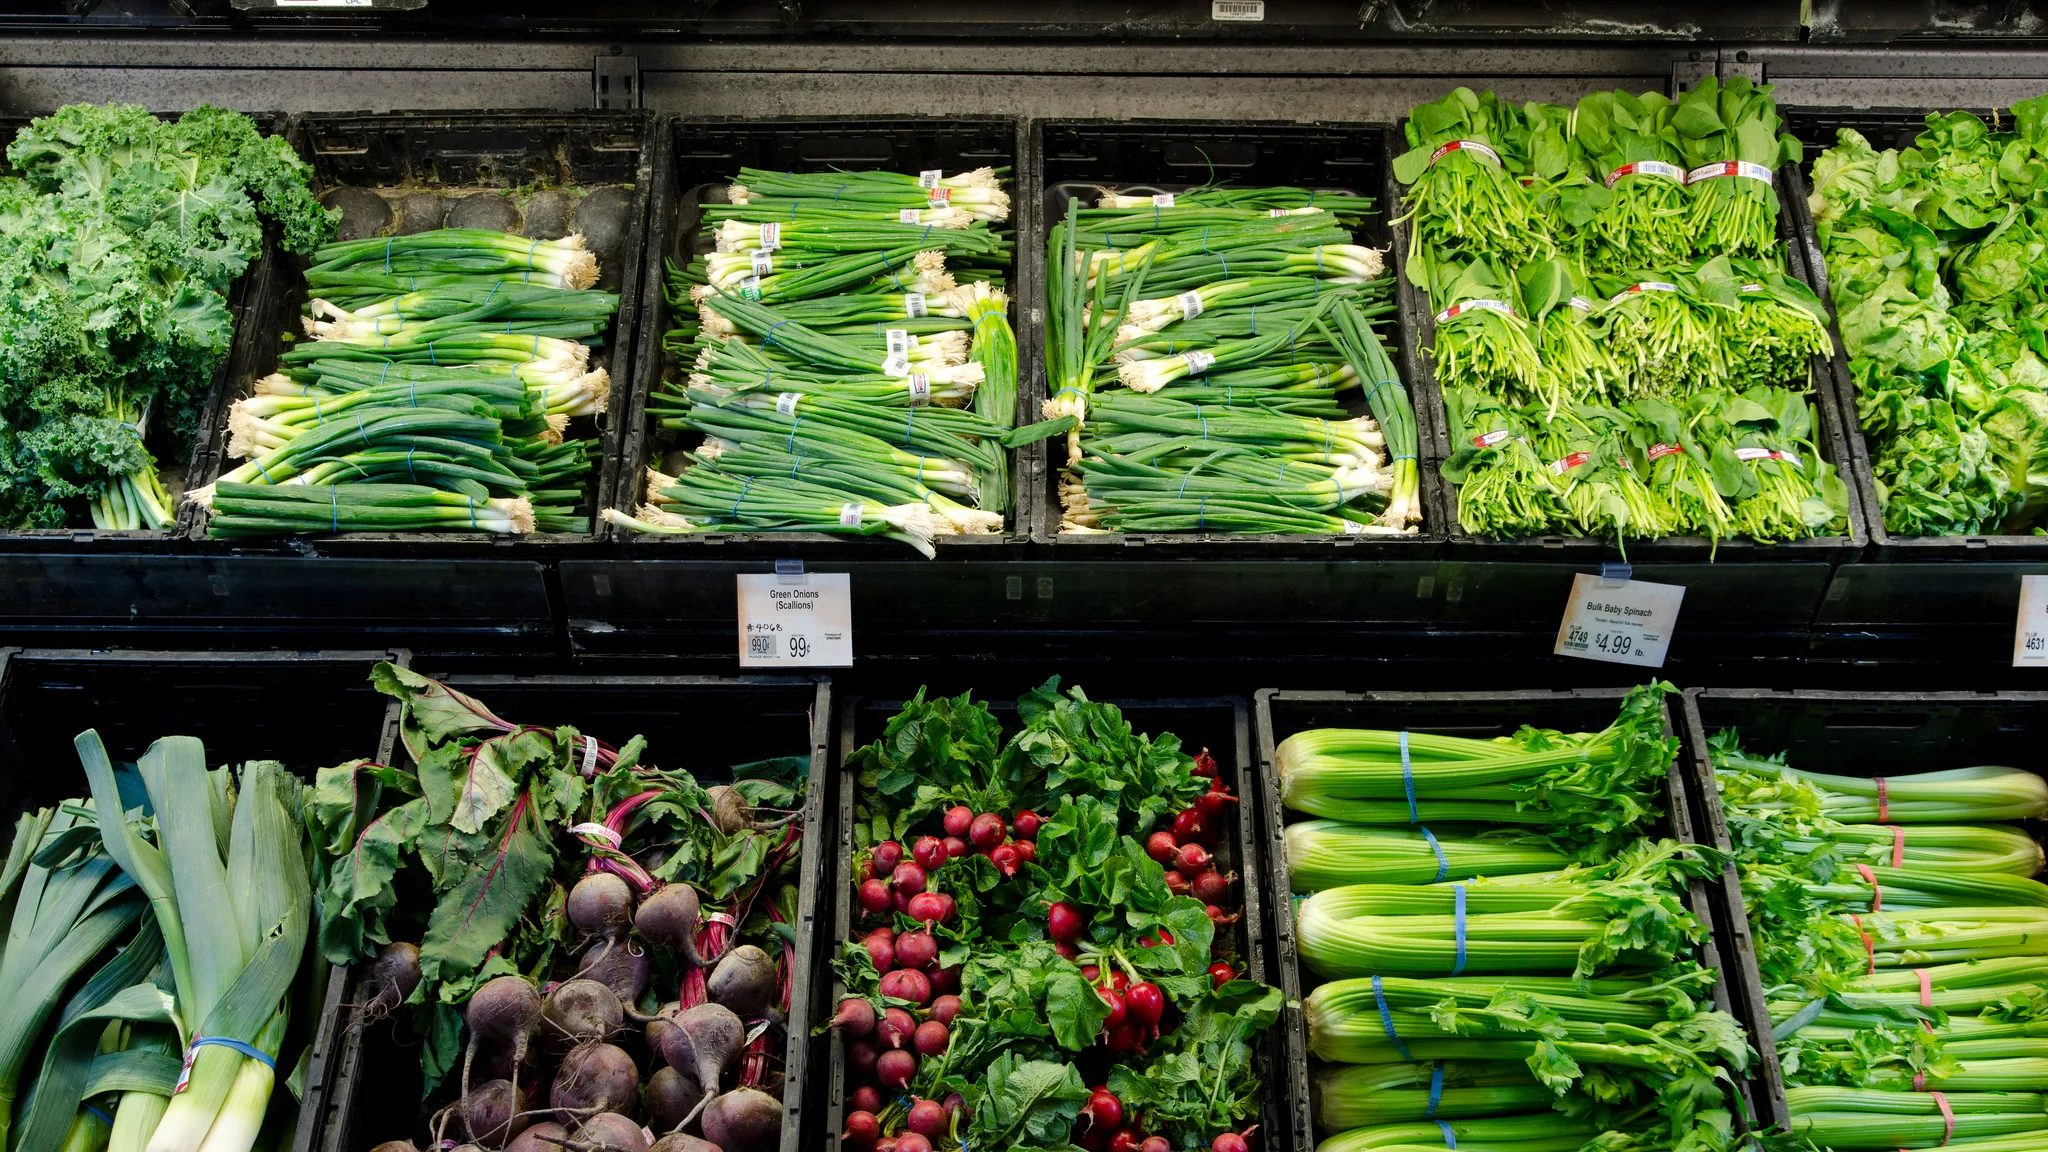

In [12]:
#import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [3]:
#load the datasets into dataframes
df1=pd.read_csv("C:\\Users\\raymo\\Downloads\\Groceries\\annex1.csv")
df2=pd.read_csv("C:\\Users\\raymo\\Downloads\\Groceries\\annex2.csv")

In [9]:
#have a look at the datasets
df1.head(4)

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables


In [10]:
df2.head(4)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No


In [4]:
#let's merge the dataframes using common field i.e.,Item Code
df=df1.merge(df2,on='Item Code')

In [12]:
df.head(4)

,Item Code,Item Name,Category Code,Category Name,Date,Time,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables,2020-10-30,10:02:13.748,0.743,5.0,sale,No
1,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables,2020-10-30,10:48:42.707,0.502,5.0,sale,No
2,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables,2020-10-30,11:10:13.023,0.301,5.0,sale,No
3,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables,2020-10-30,12:34:32.084,0.382,5.0,sale,No


**DATA CLEANING**

In [19]:
#check the dtypes
df.dtypes

Item Code                               int64
Item Name                              object
Category Code                           int64
Category Name                          object
Date                           datetime64[ns]
Time                                   object
Quantity Sold (kilo)                  float64
Unit Selling Price (RMB/kg)           float64
Sale or Return                         object
Discount (Yes/No)                      object
dtype: object

In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.dtypes

Item Code                               int64
Item Name                              object
Category Code                           int64
Category Name                          object
Date                           datetime64[ns]
Time                                   object
Quantity Sold (kilo)                  float64
Unit Selling Price (RMB/kg)           float64
Sale or Return                         object
Discount (Yes/No)                      object
dtype: object

In [28]:
#check for null values
df.isnull().sum()

Item Code                      0
Item Name                      0
Category Code                  0
Category Name                  0
Date                           0
Time                           0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
dtype: int64

In [30]:
df.head(2)

,Item Code,Item Name,Category Code,Category Name,Date,Time,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables,2020-10-30,10:02:13.748,0.743,5.0,sale,No
1,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables,2020-10-30,10:48:42.707,0.502,5.0,sale,No


**STATISTICAL ANALYSIS**

In [7]:
#what items do we have for each category/which category sells most
count=df['Category Name'].value_counts()
count

Flower/Leaf Vegetables         331968
Capsicum                       207996
Edible Mushroom                148424
Cabbage                         86570
Aquatic Tuberous Vegetables     58647
Solanum                         44898
Name: Category Name, dtype: int64

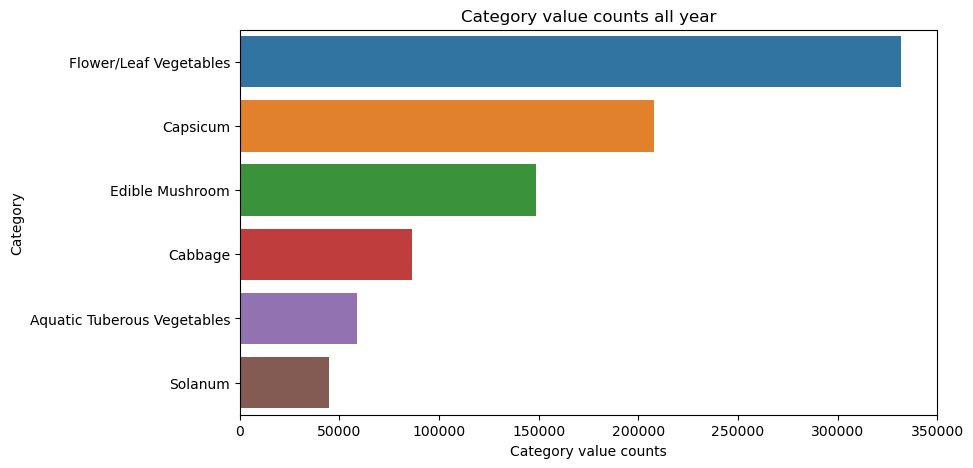

In [85]:
#visualize this

plt.figure(figsize=(9, 5))
sns.barplot(x=count.values, y=count.index, orient='h')
plt.xlabel('Category value counts')
plt.ylabel('Category')
plt.xlim(0,350000)
plt.title('Category value counts all year')
plt.show()

Flower/Leaf Vegetables has the highest count meaning it's the highest selling vegetable category assuming this reflects demand and supply.

In [8]:
#clean this category as it returns an empty array when tallied
df['Category Name'] = df['Category Name'].str.strip()

In [75]:
Items=df['Item Name'].value_counts()
Items.head(10)

Wuhu Green Pepper (1)    69945
Broccoli                 58906
Xixia Mushroom (1)       47509
Yunnan Shengcai          39887
Net Lotus Root (1)       39285
Eggplant (2)             27455
Paopaojiao (Jingpin)     25338
Yunnan Lettuces          23265
Luosi Pepper             22678
Chinese Cabbage          19148
Name: Item Name, dtype: int64

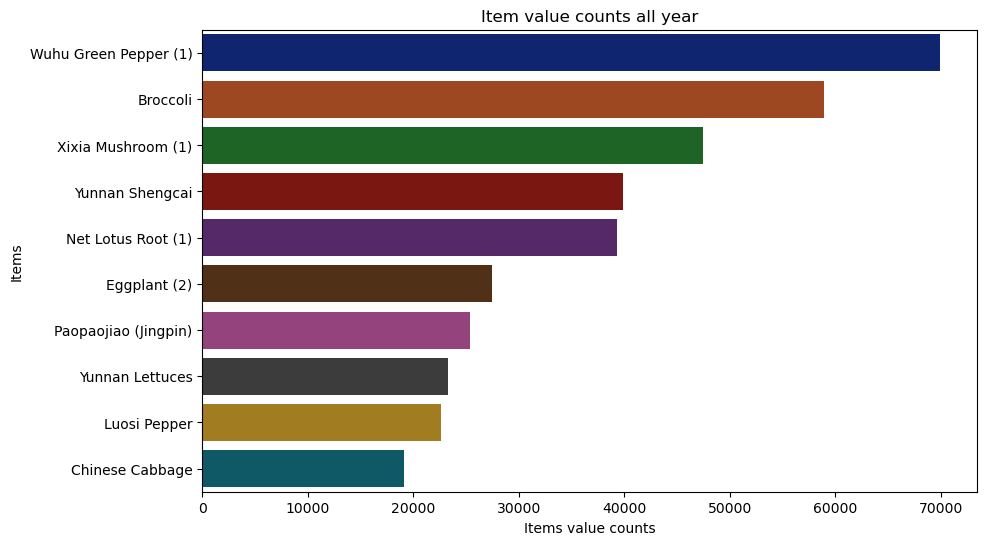

In [83]:
#visualize this count to clarify best selling items
plt.figure(figsize=(10, 6))
sns.barplot(x=Items.head(10).values, y=Items.head(10).index, palette="dark", orient='h')
plt.xlabel('Items value counts')
plt.ylabel('Items')
plt.title('Item value counts all year')
plt.show()

The results above express Wuhu Green Pepper (1) is the highest selling item in the supermarket.

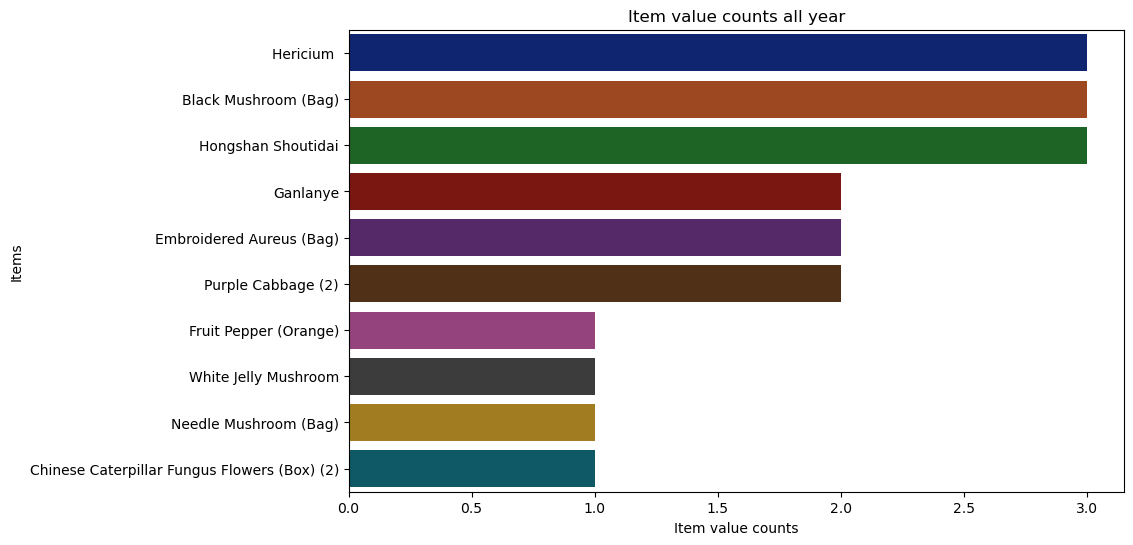

In [84]:
#deduce the lowest selling items
plt.figure(figsize=(10, 6))
sns.barplot(x=Items.tail(10).values, y=Items.tail(10).index, palette="dark", orient='h')
plt.xlabel('Item value counts')
plt.ylabel('Items')
plt.title('Item value counts all year')
plt.show()

Hericium is the lowest selling item in the supermarket. The rest as well rarely sell and the supermarket should take a look at this insight and decide on the effectiveness of selling these items.

In [9]:
#deduce how much each category generated in revenues
# Group by 'Category Name' and calculate total quantity and revenue
category_summary = df.groupby('Category Name').agg({
    'Quantity Sold (kilo)': 'sum',
    'Unit Selling Price (RMB/kg)': 'first'  # Assuming unit price is the same for the category
}).reset_index()
# Calculate total revenue for each category
category_summary['Total Revenue (RMB)'] = category_summary['Quantity Sold (kilo)'] * category_summary['Unit Selling Price (RMB/kg)']
print(category_summary[['Category Name', 'Quantity Sold (kilo)', 'Total Revenue (RMB)']])


                 Category Name  Quantity Sold (kilo)  Total Revenue (RMB)
0  Aquatic Tuberous Vegetables             40581.353           649301.648
1                      Cabbage             41766.451           584730.314
2                     Capsicum             91588.629          1099063.548
3              Edible Mushroom             76086.725          1795646.710
4       Flower/Leaf Vegetables            198520.978           992604.890
5                      Solanum             22431.782           134590.692


In [90]:
#arrange the results for interpretation
category_summary = category_summary.sort_values(by='Total Revenue (RMB)', ascending=False)
category_summary

,Category Name,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Total Revenue (RMB)
3,Edible Mushroom,76086.725,23.6,1795646.710
2,Capsicum,91588.629,12.0,1099063.548
4,Flower/Leaf Vegetables,198520.978,5.0,992604.890
0,Aquatic Tuberous Vegetables,40581.353,16.0,649301.648
1,Cabbage,41766.451,14.0,584730.314
5,Solanum,22431.782,6.0,134590.692


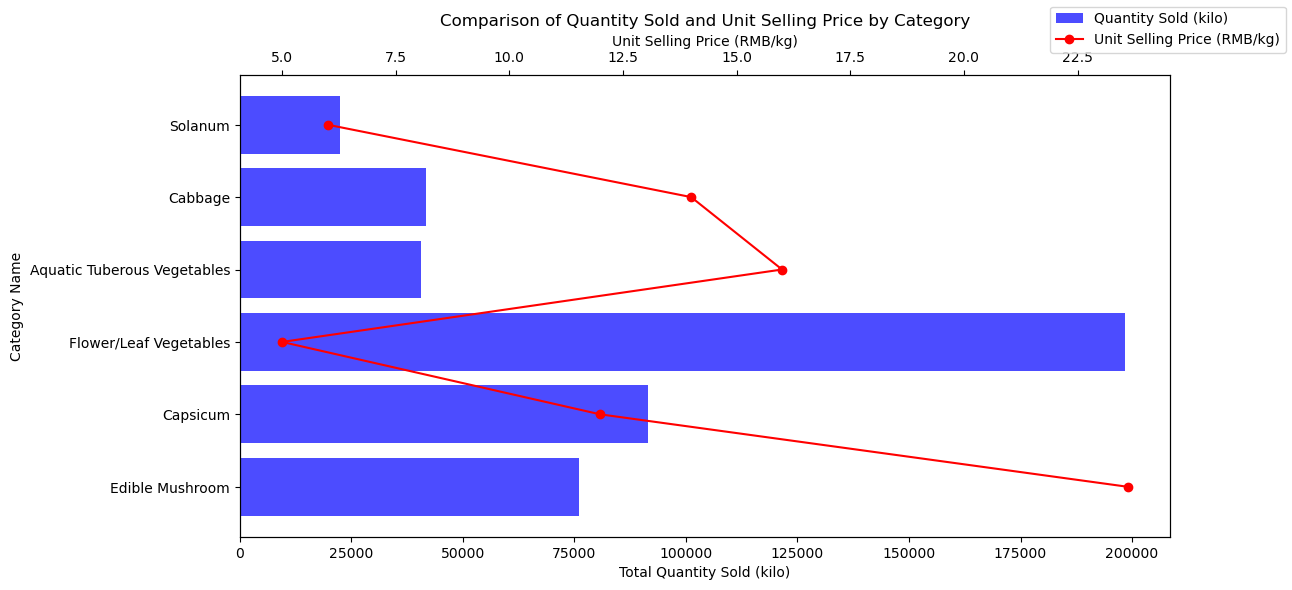

In [91]:
#visualize Total Quantity Sold (kilo) and Unit Selling Price (RMB/kg) for each category
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.barh(category_summary['Category Name'], category_summary['Quantity Sold (kilo)'], color='b', alpha=0.7, label='Quantity Sold (kilo)')
ax1.set_xlabel('Total Quantity Sold (kilo)')
ax1.set_ylabel('Category Name')

ax2 = ax1.twiny()
ax2.plot(category_summary['Unit Selling Price (RMB/kg)'], category_summary['Category Name'], 'ro-', label='Unit Selling Price (RMB/kg)')
ax2.set_xlabel('Unit Selling Price (RMB/kg)')

fig.legend(loc='upper right')
plt.title('Comparison of Quantity Sold and Unit Selling Price by Category')
plt.show()

From the plot above,we see that Edible Mushroom generated the most revenues in the store.
And Flower/Leaf Vegetables has the highest weight sold.
Solanum generated the least revenues and has the least weight sold.

In [97]:
#can we deduce which hour has the highest sales?
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
# Group the data by hour and calculate the total sales
hourly_sales = df.groupby(df['Datetime'].dt.hour)['Quantity Sold (kilo)'].sum()
# Reset the index for readability
hourly_sales = hourly_sales.reset_index()
# Rename columns for clarity
hourly_sales.columns = ['Hour', 'Total Sales (kilo)']
hourly_sales.sort_values(by='Total Sales (kilo)',ascending=False)

,Hour,Total Sales (kilo)
2,10,64158.315
3,11,50375.787
9,17,48993.677
10,18,46491.036
8,16,43980.238
1,9,39358.911
11,19,33741.940
7,15,33407.127
12,20,30594.715
4,12,26387.613


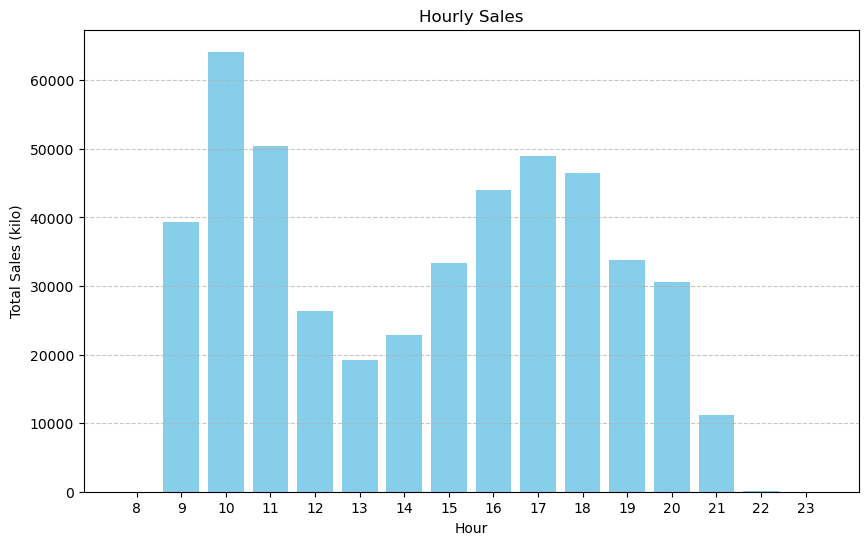

In [99]:
#visualize this
plt.figure(figsize=(10, 6))
plt.bar(hourly_sales['Hour'], hourly_sales['Total Sales (kilo)'], color='skyblue')
plt.xlabel('Hour')
plt.ylabel('Total Sales (kilo)')
plt.title('Hourly Sales')
plt.xticks(hourly_sales['Hour'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The shop is open for 16 hours. From the results above, **10 a.m** registers the highest sales. Where as **11 p.m** registered the lowest sales infact registering losses together with **8 a.m** and **10 p.m** registering very low sales.
This is very insightful as we could advise the shop to close during these times to cost-cut in various ways like electricity bills e.t.c.
We can declare 3 p.m to 7 p.m as our rush hours.

In [105]:
#let's deduce monthly sales
df['Datetime'] = pd.to_datetime(df['Datetime'])
#create a new column month and extract month from datetime
df['Month'] = df['Datetime'].dt.strftime('%Y-%m')
#group the values by Month and see sales per month
monthly_sales = df.groupby('Month')['Quantity Sold (kilo)'].sum()
monthly_sales = monthly_sales.reset_index()
#rename dataframe for clarity
monthly_sales.columns = ['Month', 'Total Sales (kilo)']
monthly_sales

,Month,Total Sales (kilo)
0,2020-07,13613.125
1,2020-08,15475.616
2,2020-09,12110.885
3,2020-10,15065.836
4,2020-11,14973.777
5,2020-12,15344.760
6,2021-01,15061.949
7,2021-02,17597.232
8,2021-03,12568.773
9,2021-04,10776.295


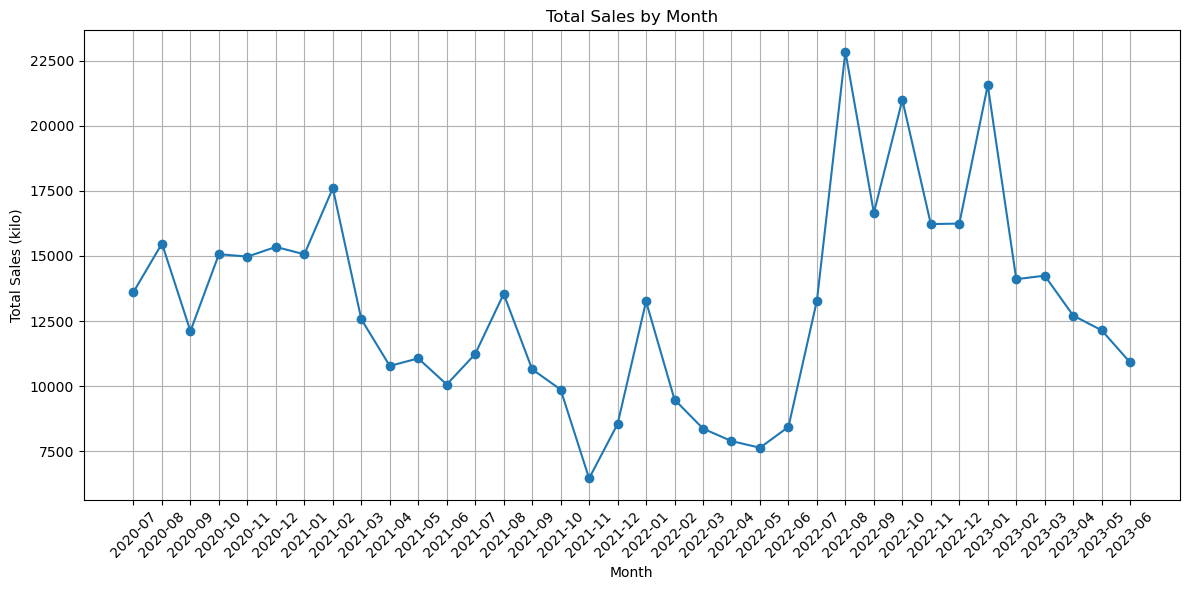

In [106]:
#visualize the monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Total Sales (kilo)'], marker='o', linestyle='-')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales (kilo)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.tight_layout()
plt.show()

From the visualization above we deduce:
1. Sales have been dropping since January 2023.
2. Sales consistently increased from May 2022 to August. This can be attributed to something like discounts.
3. Declined gradual sales notable from Feb 2021 to June 2021

The ups and downs from the plot creates a need to investigate discounts.

In [109]:
#deduce insights from discounts
#create month dataframe
df['Month'] = df['Date'].dt.to_period('M')
discounts_per_month = df[df['Discount (Yes/No)'] == 'Yes'].groupby('Month')['Discount (Yes/No)'].count()
discounts_per_month = discounts_per_month.reset_index()
discounts_per_month.columns = ['Month', 'Number of Discounts']
discounts_per_month

,Month,Number of Discounts
0,2020-07,2715
1,2020-08,471
2,2020-09,206
3,2020-10,266
4,2020-11,179
5,2020-12,577
6,2021-01,491
7,2021-02,387
8,2021-03,101
9,2021-04,334


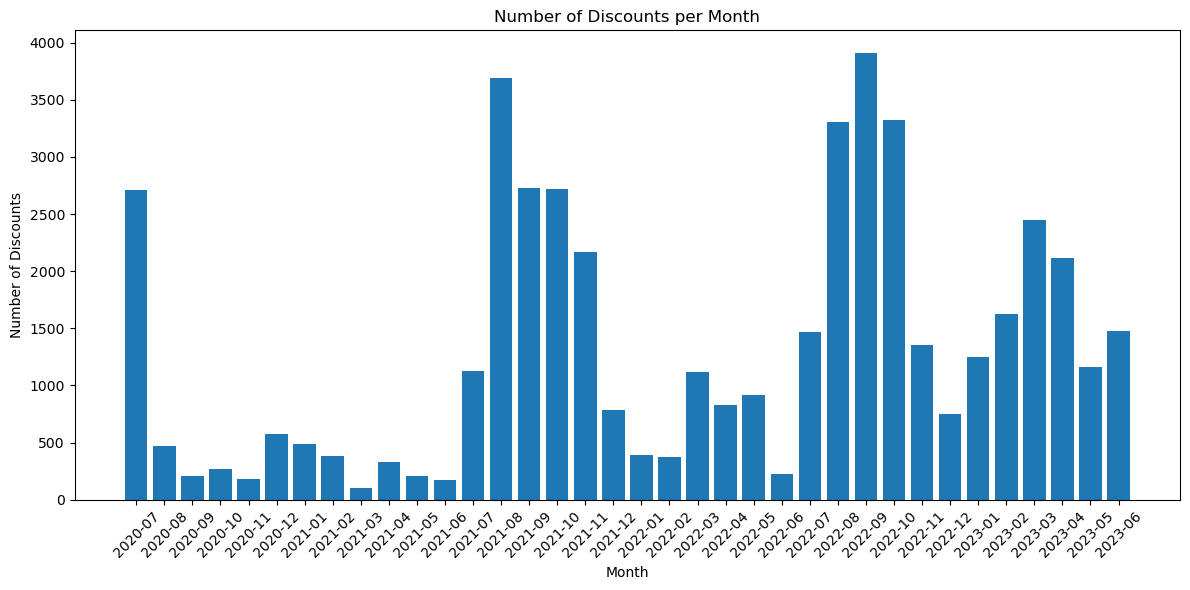

In [112]:
# Plotting the results as a bar chart
discounts_per_month['Month'] = discounts_per_month['Month'].astype(str)
plt.figure(figsize=(12, 6))
plt.bar(discounts_per_month['Month'], discounts_per_month['Number of Discounts'])

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Number of Discounts')
plt.title('Number of Discounts per Month')

# Rotating x-axis labels for readability (optional)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Months with the highest discounts are:
1. September 2020
2. March 2021
3. June 2022
4. March 2023

Whereas the months with the highest sales are:
1. August 2020
2. February 2021
3. August 2022
4. January 2023.

Therefore we can hardly associate the sales to discounts without further tests

In [26]:
df['Revenue'] = df['Quantity Sold (kilo)'] * df['Unit Selling Price (RMB/kg)']
yearly_revenue = df.groupby(df['Date'].dt.year)['Revenue'].sum().reset_index()
yearly_revenue.columns = ['Year', 'Total Revenue']
yearly_revenue

,Year,Total Revenue
0,2020,6.695293e+05
1,2021,1.100363e+06
2,2022,1.036772e+06
3,2023,5.631021e+05


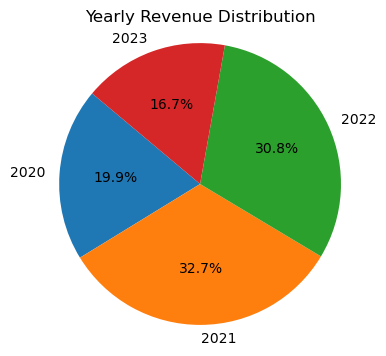

In [122]:
plt.figure(figsize=(4, 4))
plt.pie(yearly_revenue['Total Revenue'], labels=yearly_revenue['Year'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Yearly Revenue Distribution')
plt.show()

2021 generated the highest sales probably due to resumption of normal daily routines from Covid-19. We can cement this from the low sales in the last half of 2020.

In [11]:
#test if 2021 had more discouts than 2022 to support our hypothesis that discounts have an impact on sales
# Filter the dataset for the year 2021 and count the number of discounts
discounts_2021 = df[(df['Date'].dt.year == 2021) & (df['Discount (Yes/No)'] == 'Yes')]
count_discounts_2021 = len(discounts_2021)

# Filter the dataset for the year 2022 and count the number of discounts
discounts_2022 = df[(df['Date'].dt.year == 2022) & (df['Discount (Yes/No)'] == 'Yes')]
count_discounts_2022 = len(discounts_2022)

discounts_2023 = df[(df['Date'].dt.year == 2023) & (df['Discount (Yes/No)'] == 'Yes')]
count_discounts_2023 = len(discounts_2023)

print(f"Discounts in 2021: {count_discounts_2021}")
print(f"Discounts in 2022: {count_discounts_2022}")
print(f"Discounts in 2023: {count_discounts_2023}")


Discounts in 2021: 14917
Discounts in 2022: 17969
Discounts in 2023: 10066


There were more discounts in 2022 than in 2021 despite the fact that 2021 had more sales than 2022.
With this, we can deduce that there are other factors other than discounts that affect prices.

In [128]:
#deduce discounts impact on sales
discounted_sales = df[df['Discount (Yes/No)'] == 'Yes']['Revenue']
non_discounted_sales = df[df['Discount (Yes/No)'] == 'No']['Revenue']
discounted_sales_mean = discounted_sales.mean()
non_discounted_sales_mean = non_discounted_sales.mean()
#perform a t-test 
t_stat, p_value = stats.ttest_ind(discounted_sales, non_discounted_sales, equal_var=False)
if p_value < 0.05:
    print("There is a significant difference between discounted and non-discounted sales.")
else:
    print("There is no significant difference between discounted and non-discounted sales.")

There is a significant difference between discounted and non-discounted sales.


In [129]:
print(p_value)

0.0


The Null Hypothesis from the test above assumes there is no significant difference between Discounted groceries and non-discounted ones while the alternative hypothesis states there is a difference.

**A P-Value of 0.0** once the test is done reveals there is a significant statistical difference that can not be left to chance but intentional measures carried by the store in this case, applying discounts plays a major impact on sales

Discounts do have a major role on sales,the more they are the higher the sales but other factors as well have an impact e.g., lifting of lockdown measures in 2021.

In [136]:
df.head()

,Item Code,Item Name,Category Code,Category Name,Date,Time,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Datetime,Revenue
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables,2020-10-30,10:02:13.748,0.743,5.0,sale,No,2020-10-30 10:02:13.748,3.715
1,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables,2020-10-30,10:48:42.707,0.502,5.0,sale,No,2020-10-30 10:48:42.707,2.510
2,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables,2020-10-30,11:10:13.023,0.301,5.0,sale,No,2020-10-30 11:10:13.023,1.505
3,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables,2020-10-30,12:34:32.084,0.382,5.0,sale,No,2020-10-30 12:34:32.084,1.910
4,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables,2020-10-30,13:33:59.748,0.261,5.0,sale,No,2020-10-30 13:33:59.748,1.305


In [12]:
#show rate of return goods in the store
returned_count = len(df[df['Sale or Return'] == 'return'])

# Count the total number of items
total_count = len(df)

# Calculate the percentage
percentage_returned = (returned_count / total_count) * 100
print(f"The percentage of returned goods in the store is: {percentage_returned:.2f}%")

The percentage of returned goods in the store is: 0.05%
